In [10]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
graduates_data = pd.read_csv('/home/jkskw/git/ela_analysis/data/graduates-major-data.csv', sep=';')
students_data = pd.read_csv('/home/jkskw/git/ela_analysis/data/students-major-data.csv', sep=';')

# Define key variables for analysis
P_WOJ = graduates_data['P_WOJ']  # Województwo lokalizacji jednostki dydaktycznej
P_ME_ZAR = graduates_data['P_ME_ZAR']  # Mediana wynagrodzeń absolwentów
P_WWZ = graduates_data['P_WWZ']  # Względny Wskaźnik Zarobków
P_WWB = graduates_data['P_WWB']  # Względny Wskaźnik Bezrobocia
P_WWB_DOSW = graduates_data['P_WWB_DOSW']  # Wskaźnik Bezrobocia dla absolwentów z doświadczeniem
P_WWB_NDOSW = graduates_data['P_WWB_NDOSW']  # Wskaźnik Bezrobocia dla absolwentów bez doświadczenia
P_CZAS_PRACA_DOSW = graduates_data['P_CZAS_PRACA_DOSW']  # Czas do pierwszej pracy dla absolwentów z doświadczeniem
P_CZAS_PRACA_NDOSW = graduates_data['P_CZAS_PRACA_NDOSW']  # Czas do pierwszej pracy dla absolwentów bez doświadczenia
P_ME_ZAR_DOSW = graduates_data['P_ME_ZAR_DOSW']  # Mediana wynagrodzeń dla absolwentów z doświadczeniem
P_ME_ZAR_NDOSW = graduates_data['P_ME_ZAR_NDOSW']  # Mediana wynagrodzeń dla absolwentów bez doświadczenia
P_N = students_data['P_N']  # Liczba studentów
P_ABS = graduates_data['P_N'] # Liczba absolwentów
P_POZIOM = graduates_data['P_POZIOM']  # Poziom studiów
P_FORMA = graduates_data['P_FORMA']  # Forma studiów
P_ROKDYP = graduates_data['P_ROKDYP'] # Rok ukończenia studiów
P_ROK_OD = students_data['P_ROK_OD'] # Rok rozpoczęcia studiów
P_KIERUNEK_NAZWA = graduates_data['P_KIERUNEK_NAZWA'] # Pełna nazwa kierunku
P_ME_ZAR_P1 = graduates_data['P_ME_ZAR_P1'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 1 roku po uzyskaniu dyplomu
P_ME_ZAR_P2 = graduates_data['P_ME_ZAR_P2'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 2 roku po uzyskaniu dyplomu
P_ME_ZAR_P3 = graduates_data['P_ME_ZAR_P3'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 3 roku po uzyskaniu dyplomu
P_ME_ZAR_P4 = graduates_data['P_ME_ZAR_P4'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 4 roku po uzyskaniu dyplomu
P_ME_ZAR_P5 = graduates_data['P_ME_ZAR_P5'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 5 roku po uzyskaniu dyplomu
P_N_SEMESTR = graduates_data['P_N_SEMESTR'] # Liczba semestrów
P_NAZWA_UCZELNI = graduates_data['P_NAZWA_UCZELNI'] # Nazwa uczelni

# Convert selected columns with numeric strings to float
for col in graduates_data.columns:
    if any(keyword in col for keyword in ['P_ME', 'P_WWZ', 'P_WWB', 'P_CZAS']):
        graduates_data[col] = graduates_data[col].astype(str).str.replace(',', '.')
        graduates_data[col] = pd.to_numeric(graduates_data[col], errors='coerce')


/tmp/ipykernel_16504/4018992455.py:7: DtypeWarning: Columns (13,14,15,16,17,18,19,57,59,61,63,65,67,81,83,85,87,89,91,105,106,108,109,111,112,114,115,117,118,120,121,135,136,138,139,141,142,144,145,147,148,150,151,165,166,168,169,171,172,174,175,177,178,180,181,195,196,198,199,201,202,204,205,207,208,210,211,225,226,229,230,232,233,235,236,238,239,241,242,256,257,259,260,262,263,265,266,268,269,271,272,288,299,300,301,303,304,306,307,309,310,312,313,315,316,330,331,337,338,340,341,343,344,346,347,349,350,364,365,367,368,370,371,373,374,376,377,379,380,394,395,403,404,406,407,409,410,412,413,415,416,430,431,433,434,436,437,439,440,442,443,445,446) have mixed types. Specify dtype option on import or set low_memory=False.
  graduates_data = pd.read_csv('/home/jkskw/git/ela_analysis/data/graduates-major-data.csv', sep=';')
/tmp/ipykernel_16504/4018992455.py:8: DtypeWarning: Columns (9,18,23,30,64,71,78,85,92,99,106,113,120) have mixed types. Specify dtype option on import or set low_memory

In [11]:
# Function to map a field to a category based on keywords
def add_field_column(dataframe, column_name):
    """
    Add a new column 'Dziedzina' to the given DataFrame based on keywords in the specified column.
    
    Args:
        dataframe (pd.DataFrame): The DataFrame to modify.
        column_name (str): The name of the column containing course names.

    Returns:
        pd.DataFrame: The updated DataFrame with the new 'Dziedzina' column.
    """
    # Dictionary mapping phrases to fields
    keywords_to_dziedzina = {
        "Prawo": "Nauki prawne",
        "Psychol": "Nauki społeczne",
        "Automat": "Automatyka",
        "Informat": "Informatyka",
        "Zarządzanie": "Ekonomia i zarządzanie",
        "lekarski": "Medycyna",
        "Ekonom": "Ekonomia i zarządzanie",
        "Mechani": "Inżynieria mechaniczna",
        "Chem": "Nauki ścisłe",
        "Budowni": "Inżynieria lądowa",
        "Archit": "Architektura",
        "Elektr": "Inżynieria elektryczna",
        "środowi": "Inżynieria środowiskowa",
    }
    
    # Function to assign a field based on keywords
    def assign_field(course_name):
        for keyword, field in keywords_to_dziedzina.items():
            if keyword.lower() in course_name.lower():  # Check if keyword exists in the course name
                return field
        return "Inne"  # Assign "Inne" if no match is found

    # Apply the function to create the new column
    dataframe['Dziedzina'] = dataframe[column_name].apply(assign_field)

    return dataframe

# Apply the function to the graduates_data DataFrame
graduates_data = add_field_column(graduates_data, 'P_KIERUNEK_NAZWA')

# The graduates_data DataFrame now includes the 'Dziedzina' column
print("The column 'Dziedzina' has been successfully added.")


The column 'Dziedzina' has been successfully added.


/tmp/ipykernel_16504/1807238553.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataframe['Dziedzina'] = dataframe[column_name].apply(assign_field)


In [13]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
label_encoder = LabelEncoder()

# Assuming these are categorical
graduates_data['P_WOJ'] = label_encoder.fit_transform(graduates_data['P_WOJ'])
graduates_data['P_POZIOM'] = label_encoder.fit_transform(graduates_data['P_POZIOM'])
graduates_data['P_FORMA'] = label_encoder.fit_transform(graduates_data['P_FORMA'])
graduates_data['Dziedzina'] = label_encoder.fit_transform(graduates_data['Dziedzina'])

# Selecting relevant numeric variables for correlation matrix
numeric_columns = [
    'P_ME_ZAR', 'P_WWZ', 'P_WWZ_DOSW', 'P_WWZ_NDOSW',
    'P_WWB', 'P_WWB_DOSW', 'P_WWB_NDOSW', 'P_CZAS_PRACA_DOSW',
    'P_CZAS_PRACA_NDOSW', 'P_ME_ZAR_DOSW', 'P_ME_ZAR_NDOSW', 'P_N','P_WOJ','P_POZIOM','P_FORMA',
    'P_ME_ZAR_P1','P_ME_ZAR_P2','P_ME_ZAR_P3','P_ME_ZAR_P4','P_ME_ZAR_P5', 'Dziedzina'
]

Epoch 1/50, Loss: 4027292034.3281
Epoch 2/50, Loss: 328835684.6094
Epoch 3/50, Loss: 228738986.3359
Epoch 4/50, Loss: 197978085.7070
Epoch 5/50, Loss: 180169393.7656
Epoch 6/50, Loss: 169531242.2324
Epoch 7/50, Loss: 158979974.8984
Epoch 8/50, Loss: 152274180.8652
Epoch 9/50, Loss: 147613624.5859
Epoch 10/50, Loss: 144070828.9648
Epoch 11/50, Loss: 138941001.8652
Epoch 12/50, Loss: 136960193.9150
Epoch 13/50, Loss: 134269411.7363
Epoch 14/50, Loss: 133005098.2979
Epoch 15/50, Loss: 131712889.6797
Epoch 16/50, Loss: 129812541.6211
Epoch 17/50, Loss: 129690250.7744
Epoch 18/50, Loss: 128341744.5430
Epoch 19/50, Loss: 126649288.8447
Epoch 20/50, Loss: 125512664.5762
Epoch 21/50, Loss: 124691457.4590
Epoch 22/50, Loss: 123405085.7881
Epoch 23/50, Loss: 124639356.0430
Epoch 24/50, Loss: 122098798.5664
Epoch 25/50, Loss: 121292310.8613
Epoch 26/50, Loss: 120084593.5664
Epoch 27/50, Loss: 122619413.6953
Epoch 28/50, Loss: 119371562.6914
Epoch 29/50, Loss: 118554635.9766
Epoch 30/50, Loss: 117

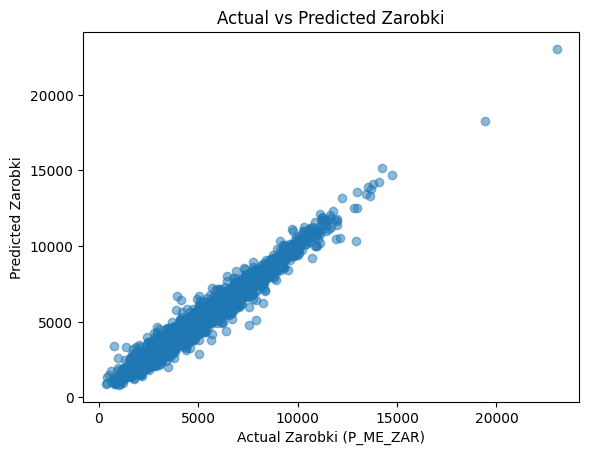

In [16]:
# Importing necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data for training
# Select the numeric columns and the target variable
features = graduates_data[numeric_columns].drop(columns=['P_ME_ZAR'])
target = graduates_data['P_ME_ZAR']

# Handle missing values by filling with the mean
features = features.fillna(features.mean())
target = target.fillna(target.mean())

# Scale the features for better performance
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=42
)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Define the deep neural network model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)        # Second hidden layer
        self.fc3 = nn.Linear(64, 32)         # Third hidden layer
        self.fc4 = nn.Linear(32, 1)          # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the model
input_dim = X_train.shape[1]
model = RegressionModel(input_dim)

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error for regression tasks
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
batch_size = 32

for epoch in range(epochs):
    model.train()
    permutation = torch.randperm(X_train_tensor.size(0))
    epoch_loss = 0.0

    for i in range(0, X_train_tensor.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).numpy()

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(predictions - y_test_tensor.numpy()))
print(f"Test MAE: {mae:.2f}")

# Visualize the predictions
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Actual Zarobki (P_ME_ZAR)")
plt.ylabel("Predicted Zarobki")
plt.title("Actual vs Predicted Zarobki")
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Check for GPU availability
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# Define the predict_salary function
def predict_salary(model, input_features, scaler):
    """
    Predicts salary using the trained PyTorch model.

    Args:
        model (torch.nn.Module): Trained PyTorch model.
        input_features (list or dict): Input features in the order:
            ['P_ME_ZAR', 'P_WWZ', 'P_WWZ_DOSW', 'P_WWZ_NDOSW',
             'P_WWB', 'P_WWB_DOSW', 'P_WWB_NDOSW', 'P_CZAS_PRACA_DOSW',
             'P_CZAS_PRACA_NDOSW', 'P_ME_ZAR_DOSW', 'P_ME_ZAR_NDOSW', 'P_N',
             'P_WOJ', 'P_POZIOM', 'P_FORMA', 'P_ME_ZAR_P1', 'P_ME_ZAR_P2',
             'P_ME_ZAR_P3', 'P_ME_ZAR_P4', 'P_ME_ZAR_P5', 'Dziedzina']
        scaler (StandardScaler): Fitted scaler for normalizing input features.
        device (torch.device): Device on which the model is running (GPU/CPU).

    Returns:
        float: Predicted salary.
    """
    # Convert input features to a NumPy array if not already
    if isinstance(input_features, dict):
        input_values = [input_features[key] for key in input_features.keys()]
    else:
        input_values = input_features

    # Scale the input features
    input_values_scaled = scaler.transform([input_values])

    # Convert to PyTorch tensor and move to the same device as the model
    input_tensor = torch.tensor(input_values_scaled, dtype=torch.float32)

    # Make prediction
    model.eval()
    with torch.no_grad():
        predicted_salary = model(input_tensor).cpu().numpy()[0, 0]

    return predicted_salary


# Corrected example input (exclude 'P_ME_ZAR' because it's the target variable)
example_input = {
    'P_WWZ': 3,
    'P_WWZ_DOSW': 1.5,
    'P_WWZ_NDOSW': 0.9,
    'P_WWB': 2,
    'P_WWB_DOSW': 0.2,
    'P_WWB_NDOSW': 0.4,
    'P_CZAS_PRACA_DOSW': 3,
    'P_CZAS_PRACA_NDOSW': 6,
    'P_ME_ZAR_DOSW': 4000,
    'P_ME_ZAR_NDOSW': 3000,
    'P_N': 400,
    'P_WOJ': 7,  # Encoded województwo
    'P_POZIOM': 2,  # Encoded study level
    'P_FORMA': 1,  # Encoded study form (e.g., 0 = full-time)
    'P_ME_ZAR_P1': 500,
    'P_ME_ZAR_P2': 3700,
    'P_ME_ZAR_P3': 4000,
    'P_ME_ZAR_P4': 4200,
    'P_ME_ZAR_P5': -6000,
    'Dziedzina': 1 # Encoded field (e.g., Informatyka = 2)
}

# Predict salary
predicted_salary = predict_salary(model, example_input, scaler)
print(f"Predicted salary: {predicted_salary:.2f} PLN")


Predicted salary: 6113.32 PLN


/home/jkskw/git/ela_analysis/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
